In [1]:
import numpy as np
import cvxopt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors

In [69]:
t_del = 1
v_init = np.array([10,10])

class MPC_Agent:
    def __init__(self, start, goal, steps, vmax):
        self.xpath = []
        self.ypath = []
        self.time = 0
        self.pos = start
        self.goal = goal
        self.v = v_init
        self.steps = steps
        self.vmax = vmax
        
    def traj_opti(self):
        print("start Vx: ", self.v[0], "start Vy: ", self.v[1])
       
        x = (t_del) * np.ones((self.steps,1))
        kx = self.pos[0] - self.goal[0]
        ky = self.pos[1] - self.goal[1]
        print(kx, ky)
        P_mat_x = 2 * np.matmul(x, x.T)
        Px = cvxopt.matrix(P_mat_x, tc = 'd')
        Q_mat_x = 2 * t_del * kx * np.ones((self.steps,1))
        Qx = cvxopt.matrix(Q_mat_x, tc = 'd')
        G_mat_x = np.zeros((2 * self.steps, self.steps))
        for i in range(0, self.steps):
            G_mat_x[i][i] = -1
            G_mat_x[i + self.steps][i] = 1
        H_mat_x = np.zeros((2 * self.steps, 1))
        for i in range(0, self.steps):
            H_mat_x[i] = 0
            H_mat_x[i + self.steps] = self.vmax
        Gx = cvxopt.matrix(G_mat_x, tc = 'd')
        Hx = cvxopt.matrix(H_mat_x, tc = 'd')
        sol1 = cvxopt.solvers.qp(Px,Qx,Gx,Hx,options={'show_progress': False})
        
        y = (t_del) * np.ones((self.steps,1))
        P_mat_y = 2 * np.matmul(y, y.T)
        Py = cvxopt.matrix(P_mat_y, tc = 'd')
        Q_mat_y = 2 * t_del * ky * np.ones((self.steps,1))
        Qy = cvxopt.matrix(Q_mat_y, tc = 'd')
        G_mat_y = np.zeros((2 * self.steps, self.steps))
        for i in range(0, self.steps):
            G_mat_y[i][i] = -1
            G_mat_y[i + self.steps][i] = 1
        H_mat_y = np.zeros((2 * self.steps, 1))
        for i in range(0, self.steps):
            H_mat_y[i] = 0
            H_mat_y[i + self.steps] = self.vmax
        Gy = cvxopt.matrix(G_mat_y, tc = 'd')
        Hy = cvxopt.matrix(H_mat_y, tc = 'd')
        sol2 = cvxopt.solvers.qp(Py,Qy,Gy,Hy,options={'show_progress': False})
        
        for i in range(0,self.steps):
            x_i = self.pos[0] + sol1['x'][i] * t_del
            y_i = self.pos[1] + sol2['x'][i] * t_del
            
            print(sol1['x'][i])
            print(sol2['x'][i])
            self.xpath.append(x_i.astype('float'))
            self.ypath.append(y_i.astype('float'))
            self.pos[0] = x_i
            self.pos[1] = y_i
            print(self.pos[0], self.pos[1])
                
        print('----------------------------------------------')
        self.time += 1
        self.visualize_traj()
    
    def visualize_traj(self):
        x_path = np.array(self.xpath)
        y_path = np.array(self.ypath)
        plt.plot(x_path, y_path)
        plt.show()

start Vx:  10 start Vy:  10
-14.0 -19.0
0.7000001405066717
0.9500000710652508
1.7000001405066718 1.9500000710652508
0.7000001405066701
0.9500000710652502
2.400000281013342 2.900000142130501
0.7000001405066723
0.9500000710652511
3.100000421520014 3.8500002131957523
0.7000001405066711
0.9500000710652496
3.8000005620266855 4.800000284261002
0.7000001405154155
0.9500000710652575
4.500000702542101 5.75000035532626
0.7000001405154163
0.9500000710652584
5.200000843057517 6.700000426391519
0.700000140515416
0.9500000710652586
5.900000983572934 7.6500004974567775
0.7000001405154163
0.9500000710652584
6.60000112408835 8.600000568522036
0.7000001405155032
0.9500000710652574
7.3000012646038535 9.550000639587294
0.7000001405155026
0.9500000710652571
8.000001405119356 10.500000710652552
0.700000140515504
0.9500000710652575
8.70000154563486 11.45000078171781
0.7000001405155025
0.9500000710652574
9.400001686150363 12.400000852783068
0.7000001405154179
0.9500000710184008
10.10000182666578 13.3500009238

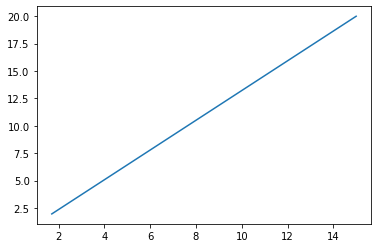

In [70]:
bot = MPC_Agent(np.array([1.0,1.0]),np.array([15.0,20.0]),20, 20.0)
bot.traj_opti()